In [1]:
from tensorflow import keras
import keras

In [2]:
from keras.datasets import mnist
import numpy as np
 
#TODO load MNIST data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
train_images = train_images.astype('float32') / 255.0
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
 
#TODO Prepare the test samples as above
test_images = test_images.astype('float32') / 255.0
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
 
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))
 
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
 
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
 
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
 
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
 
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
 
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [11]:
#TODO configure the model to use a binary crossentropy loss and the Adam optimizer:
autoencoder.compile(optimizer = 'Adam',
                    loss = 'binary_crossentropy',
                    metrics=['accuracy'])
 
#TODO complete fit(). As a starting point set epoch to 50, batch size to 256, shuffle data, and use x_test as a validation set.
#Later You can experiment with those values
autoencoder.fit(train_images, train_images, 
                epochs=50, 
                batch_size=256,
                shuffle=True,
                validation_data = (test_images,test_images))
 
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0081 - val_accuracy: 0.0000e+00 - val_loss: 0.0043
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0135 - loss: 0.0041 - val_accuracy: 0.0168 - val_loss: 0.0041
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0181 - loss: 0.0040 - val_accuracy: 0.0196 - val_loss: 0.0041
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0203 - loss: 0.0040 - val_accuracy: 0.0195 - val_loss: 0.0041
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0191 - loss: 0.0040 - val_accuracy: 0.0194 - val_loss: 0.0040
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0198 - loss: 0.0040 - val_accuracy: 0.0212 - val_loss: 0.0040
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0206 - loss: 0.0040 - val_accuracy: 0.0188 - val_loss: 0.0040
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0187 - loss: 0.0040 - val_accu

In [7]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,978 (597.57 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,986 (398.39 KB)

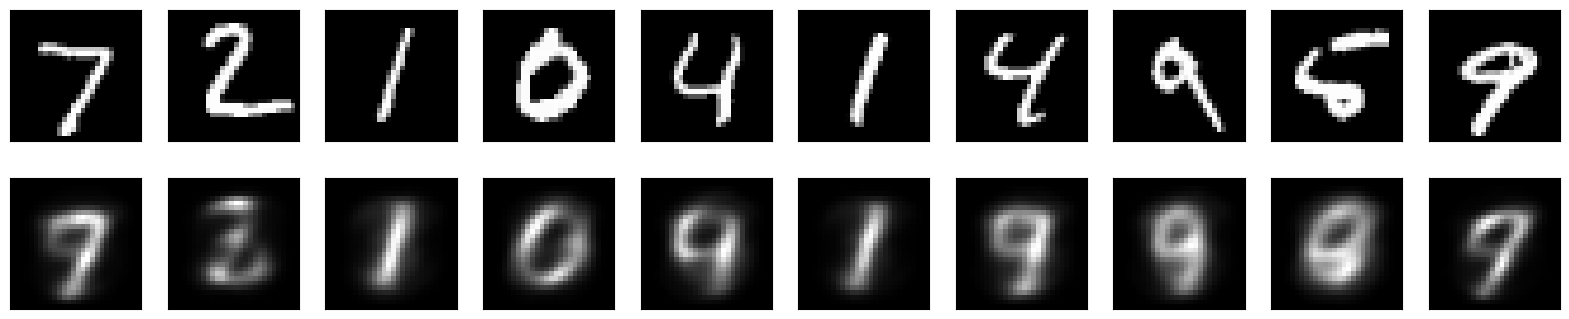

In [13]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

CONVOLUTIONAL AUTOENCODER

In [9]:
from tensorflow.keras.datasets import mnist
import numpy as np
 
#TODO load MNIST data set and convert it to [0,1] range like before.
(x_train, _), (x_test, _) =
 
x_train = 
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
 
#TODO Prepare the test samples as above
x_test =
x_test =

SyntaxError: invalid syntax (336225151.py, line 5)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
 
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
 
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
 
autoencoder = Model(input_img, decoded)
#TODO configure model to use a binary crossentropy loss, and the Adam optimizer:
 
autoencoder.compile(#TODO)
#TODO complete fit(). Set epoch to 10, batch size to 128, shuffle data, and use x_test as a validation set.
#You can experiment with those values. If training takes a lot of time, try to reduce the number of epochs (but monitor loss value).
 
autoencoder.fit(x_train, x_train, #TODO)
 
decoded_imgs = autoencoder.predict(x_test)